In [0]:
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
data = pd.read_csv('^DJI.csv')

In [30]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-03-02,18134.050781,18288.630859,18122.589844,18288.630859,18288.630859,89790000
1,2015-03-03,18281.949219,18281.949219,18136.880859,18203.369141,18203.369141,83830000
2,2015-03-04,18203.369141,18203.369141,18029.500000,18096.900391,18096.900391,80900000
3,2015-03-05,18096.900391,18160.349609,18087.650391,18135.720703,18135.720703,75840000
4,2015-03-06,18135.720703,18135.720703,17825.150391,17856.779297,17856.779297,113350000


In [7]:
data.shape

(1259, 7)

In [16]:
data.Open.describe()

count     1259.000000
mean     22080.902917
std       3846.207192
min      15676.259766
25%      18062.509765
50%      21981.769531
75%      25516.320312
max      29440.470703
Name: Open, dtype: float64

In [43]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,22080.902917,22180.453207,21973.012504,22082.296874,22082.296874,2.429509e+08
std,3846.207192,3859.174698,3831.896284,3844.356408,3844.356408,1.386622e+08
min,15676.259766,15897.820313,15370.330078,15660.179688,15660.179688,4.035000e+07
25%,18062.509765,18134.740235,17987.224610,18063.620117,18063.620117,1.136150e+08
50%,21981.769531,22036.099609,21927.789063,21987.560547,21987.560547,2.523200e+08
75%,25516.320312,25654.924804,25371.165039,25518.895508,25518.895508,3.179800e+08
max,29440.470703,29568.570313,29406.750000,29551.419922,29551.419922,2.190810e+09


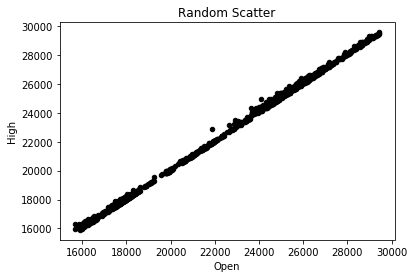

In [22]:
data.plot(x='Open', y='High',kind='scatter', color='k', title='Random Scatter')

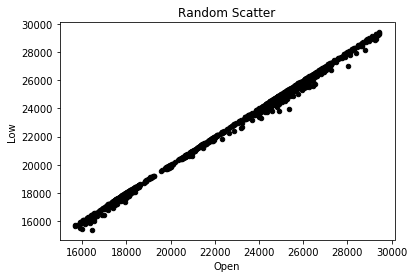

In [23]:
data.plot(x='Open', y='Low',kind='scatter', color='k', title='Random Scatter')

In [28]:
print(data.Date)

0       2015-03-02
1       2015-03-03
2       2015-03-04
3       2015-03-05
4       2015-03-06
           ...    
1254    2020-02-24
1255    2020-02-25
1256    2020-02-26
1257    2020-02-27
1258    2020-02-28
Name: Date, Length: 1259, dtype: object


In [0]:
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
#datetime type

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
Date         1259 non-null datetime64[ns]
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [34]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([735234., 735599., 735964., 736330., 736695., 737060., 737425.]),
 <a list of 7 Text xticklabel objects>)

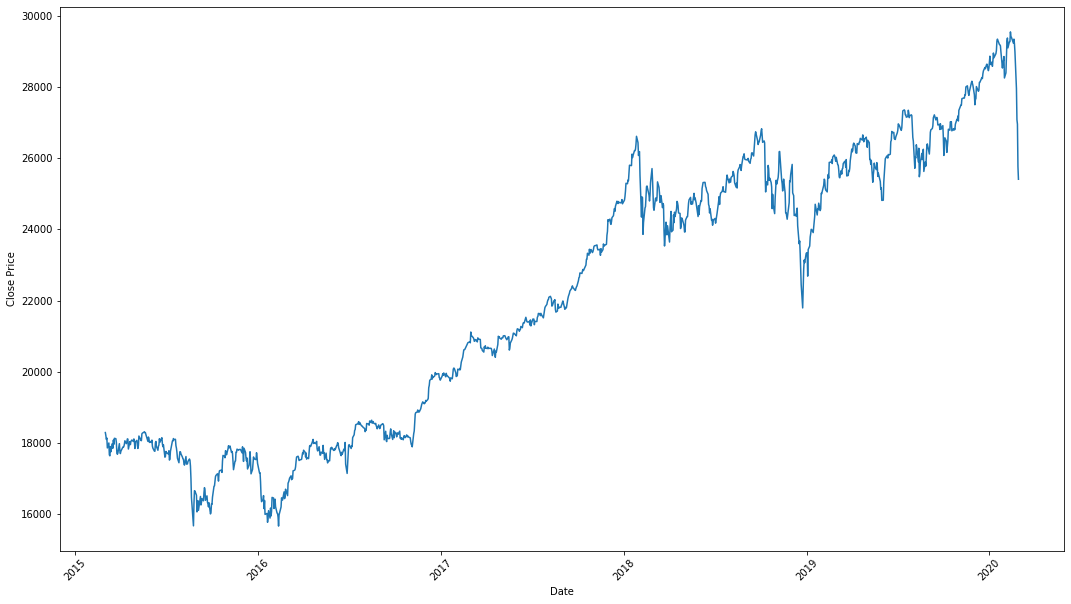

In [39]:
plt.figure(figsize=(18,10))
plt.plot('Date','Close',data=data)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

In [0]:
#creation of lag and daily returns column
#daily returns is the end price- start price multiplied by the shares you owe
#daily returns is the end price- start price then divide by opening price, then multiply by 100 to convert to a percentage

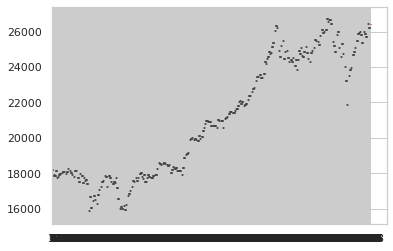

In [48]:
import seaborn as sns
sns.set(style="whitegrid")
#ax = sns.boxplot(x="Date", y="Open", data=data)

(array([14000., 16000., 18000., 20000., 22000., 24000., 26000., 28000.,
        30000., 32000.]), <a list of 10 Text xticklabel objects>)

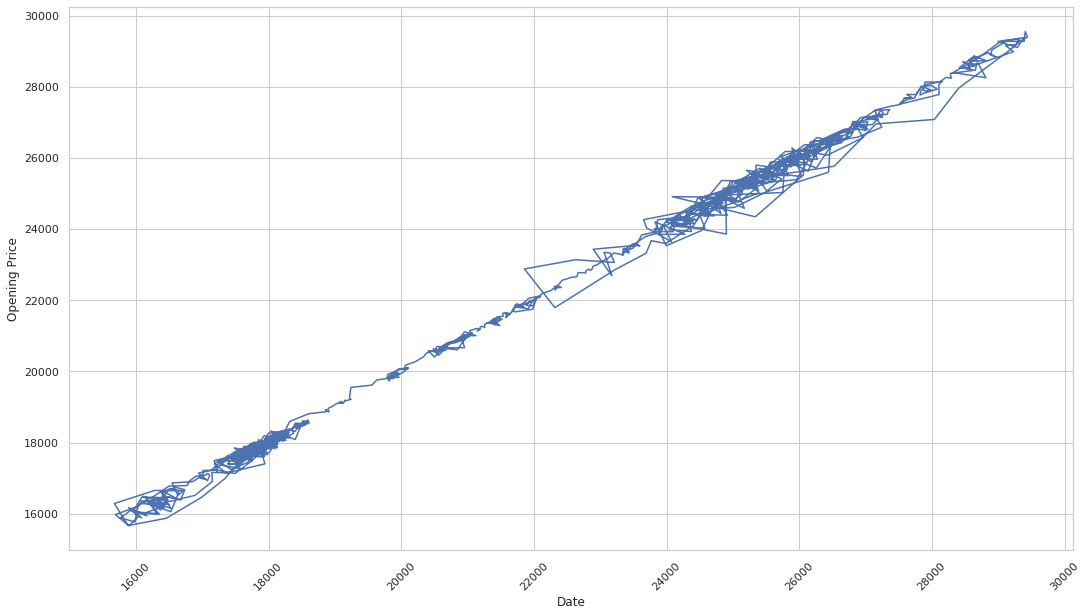

In [52]:
plt.figure(figsize=(18,10))
plt.plot('Open','Close',data=data)
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.xticks(rotation=45)

In [0]:
plt.figure(figsize=(18,10))
plt.plot('Date','Close',data=data)
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.xticks(rotation=45)

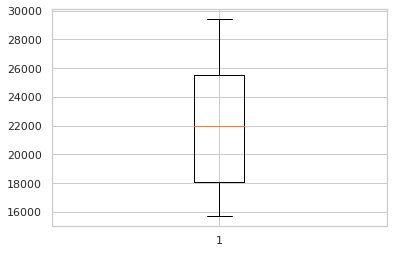

In [60]:
plt.boxplot(data['Open']) 
plt.show()

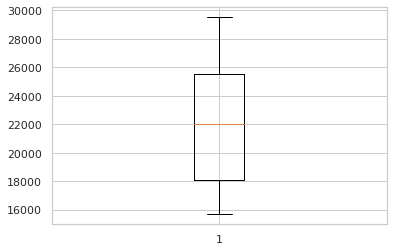

In [61]:
plt.boxplot(data['Close']) 
plt.show()

In [67]:
data['Daily Lag'] = data['Close'].shift(1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag
0,2015-03-02,18134.050781,18288.630859,18122.589844,18288.630859,18288.630859,89790000,NaN
1,2015-03-03,18281.949219,18281.949219,18136.880859,18203.369141,18203.369141,83830000,18288.630859
2,2015-03-04,18203.369141,18203.369141,18029.500000,18096.900391,18096.900391,80900000,18203.369141
3,2015-03-05,18096.900391,18160.349609,18087.650391,18135.720703,18135.720703,75840000,18096.900391
4,2015-03-06,18135.720703,18135.720703,17825.150391,17856.779297,17856.779297,113350000,18135.720703


In [69]:
data['Daily Returns'] = (data['Daily Lag']/data['Close']) -1
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Lag,Daily Returns
0,2015-03-02,18134.050781,18288.630859,18122.589844,18288.630859,18288.630859,89790000,NaN,NaN
1,2015-03-03,18281.949219,18281.949219,18136.880859,18203.369141,18203.369141,83830000,18288.630859,0.004684
2,2015-03-04,18203.369141,18203.369141,18029.500000,18096.900391,18096.900391,80900000,18203.369141,0.005883
3,2015-03-05,18096.900391,18160.349609,18087.650391,18135.720703,18135.720703,75840000,18096.900391,-0.002141
4,2015-03-06,18135.720703,18135.720703,17825.150391,17856.779297,17856.779297,113350000,18135.720703,0.015621


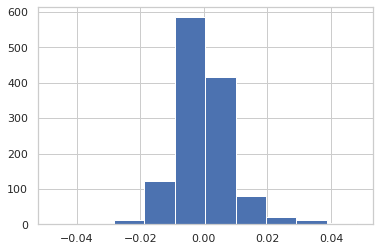

In [74]:
data['Daily Returns'].hist()

In [75]:
data['Daily Returns'].mean()

-0.00022343006589517318

In [76]:
data['Daily Returns'].std()

0.008731081397703063